# 6장. t-검정


#### 6.1 t-검정 기초

1) 평균 비교 분석 유형

t-검정: 평균을 비교하는 분석 기법 (모집단의 분산을 모를 때)

z-검정: 평균을 비교하는 분석 기법 (모집단의 분산알 때)

||t-검정|z-검정|분산분석|
|---|-----|-----|-----|
|집단의 수|2개 이하|2개 이하|3개 이상|
|모집단의 분산|모름|알고 있음|모름|
|표본의수|상관 없음|30개 이상|상관 없음|
|등분산성|고려함|고려하지 않음|고려함|
<표: 평균을 비교하는 분석 기법 차이점>

2) t-검정의 종류

|                 t-검정의 종류                 |                                   분석 목적                                   |
|:---------------------------------------------:|-----------------------------------------------------------------------------|
| 일표본   t-검정      (one sample t-test)      | 특정 수치로 알려진 모집단의 평균과 분산 비교                                  |
| 독립표본   t-검정      (two sample t-test)    | 독립된 두 표본 집단의 평균을 비교                                             |
| 쌍체표본   t-검정      (paired sample t-test) | 실험 전 집단과 실험 후 집단과 같이 쌍체로 이루어진 두 표본 집단의 평균을 비교 |


####6.2 일표본 t-검정
(1) 개념
<br/>
일표본 t-검정: 단일 표본의 수치형 변수의 평균 값이 기존에 사용하던 특정 값(모집단의 평균)과 실제로 일치하는지 판단할 수 있는 통계분석 기법
<br/>
즉, 모집단(실제 집단)의 평균이 $\mu$일 때, 모집단에서 추출한 일부집단(표본집단)의 평균 $\bar{\mu}$이 서로 일치하는지 확인하는 통계분석 기법이다.
<br/>
<br/>
1) 일표본 t-검정 값 산출 방식
<br/>
통상적으로 모집단의 표준편차($\sigma$)를 모르기 때문에 추정 표준편차($s$)를 사용하여 t-검정을 한다. 일표본 t-검정에서 t값은 모집단 평균과 표본집단 평균 차와 표준오차의 비율이다. 
* 모분산을 아는 경우(z-검정)
\begin{align}
    z = \dfrac{\bar{X} - \mu}{\dfrac{\sigma}{\sqrt{n}}}, \qquad \mu \in [\bar{X} - Z_{\frac{\alpha}{2}}\cdot\dfrac{\sigma}{\sqrt{n}}, \bar{X} + Z_{\frac{\alpha}{2}}\cdot\dfrac{\sigma}{\sqrt{n}}]
\end{align}
* 모분산을 모르는 경우(t-검정)
\begin{align}
    t = \dfrac{\bar{X} - \mu}{\dfrac{s}{\sqrt{n}}}, \qquad \mu \in [\bar{X} - t_{(\frac{\alpha}{2},n-1)}\cdot\dfrac{s}{\sqrt{n}}, \bar{X} + t_{(\frac{\alpha}{2}, n-1)}\cdot\dfrac{s}{\sqrt{n}}] 
\end{align}
이때, 일표본 t-검정의 경우 자유도가 n-1임.
<br/>
<br/>
일표본 t-검정의 귀무가설이 참이기 위해서는
\begin{align}
    z \leq z_{\alpha} \quad &or\quad t \leq t_{(\alpha, n-1)} \quad \text{(단측)}\\
    z \geq -z_{\alpha} \quad &or\quad t \geq -t_{(\alpha, n-1)} \quad \text{(단측)}\\
    |z| \leq Z_{\alpha/2} \quad &or\quad |t| \leq t_{(\frac{\alpha}{2}, n-1)} \quad \text{(양측)}
\end{align}
라는 조건이 필요하다. 다음의 예시는 해당 귀무가설의 예시이다. 

(2) 분석 및 해석
A쇼핑의 VIP 고객들의 평균 구매액은 약 700만원 이었으며, 이에 A쇼핑은 올해 VIP 그룹 고객들의 평균 구매액 목표치를 10% 상향한 770만원으로 결정했다.

그렇다면 올해 VIP고객들의 평균 구매액 목표치인 770만원을 달성하였는지 확인하기 위해 일표본 t-검정을 사용하자.
<br/>
* 가설
\begin{align}
    H_{0}(\text{귀무가설}) &= \text{A 쇼핑 VIP 고객들의 총 매출액 평균은 7,700,000원이다.}\\
    H_{1}(\text{연구가설}) &= \text{A 쇼핑 VIP 고객들의 총 매출액 평균은 7,700,000원이 아니다.} 
\end{align}


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_dir = '/content/drive/MyDrive/pythondata/데이터'
df = pd.read_csv(file_dir + '/Ashopping.csv', encoding = 'CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용 횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,매장_청결성,공간_편의성,시야_확보성,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,7,6,6,6,6,6,6,6,6
1,2,1,3168400,14,226314,22,350995,2,4,0,...,7,7,6,6,6,5,3,6,6,6
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,6,6,6,7,7,6,6,7
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,5,6,6,6,6,6,5,6
4,5,0,13745950,73,188301,9,246350,1,2,0,...,5,6,6,6,5,5,6,6,5,6


In [4]:
from scipy import stats

print('총매출액 평균:',df.총_매출액.mean())
# 일표본 t-test 불러오기
print('t-value:', round(stats.ttest_1samp(df['총_매출액'],7700000).statistic,4))
print('유의확률:{:.3f}'.format(stats.ttest_1samp(df['총_매출액'],7700000).pvalue))

import numpy as np

n = len(df['총_매출액'])
mean = df.총_매출액.mean()
std = stats.sem(df['총_매출액'])
# t-score 찾기(inverse of cdf - percentiles)
t_score = stats.t.ppf((1+0.90)/2, n-1)
interval = (mean - (std/np.sqrt(n))*t_score, mean + (std/np.sqrt(n))*t_score)

print('Critical t_score: {:.4f}'.format(t_score))
print('Confidence interval: ',interval)

총매출액 평균: 7068689.76
t-value: -2.8657
유의확률:0.004
Critical t_score: 1.6464
Confidence interval:  (7057220.490331663, 7080159.029668337)


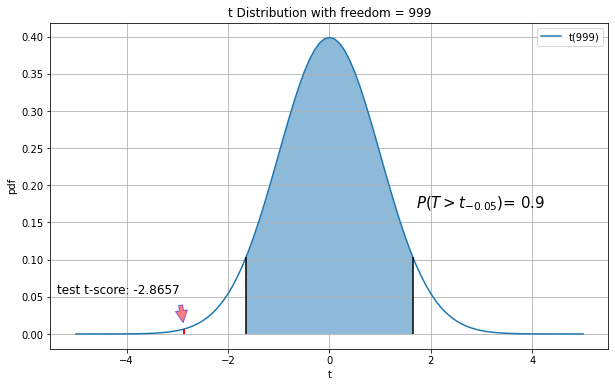

In [5]:
import math
import matplotlib.pyplot as plt
import scipy

#pdf domain
t = np.linspace(-5,5,101)
#자유도
fd = n-1
# pdf = (math.gamma((fd+1) / 2) / (math.sqrt(math.pi * fd)*math.gamma(fd / 2))) * (1 + t ** 2 / fd) ** (-(fd + 1) / 2)
pdf = stats.t(fd).pdf(t)
plt.figure(figsize=(10, 6))       
plt.plot(t, pdf)                       
plt.xlabel("t")                      
plt.ylabel("pdf")                  
# 신뢰구간 색 채우기
x_fill = np.linspace(-t_score, t_score,101)   
y_fill = stats.t(fd).pdf(x_fill)  
plt.fill_between(x_fill, y_fill, alpha = 0.5)
plt.vlines(-t_score, 0, stats.t(fd).pdf(-t_score), color='black', linestyle='solid', linewidth=1.5)
plt.vlines(t_score, 0, stats.t(fd).pdf(t_score), color='black', linestyle='solid', linewidth=1.5)
plt.text(1.71 , .17, r'$P(T>t_{-0.05})$' + f'= {0.90}',fontsize=15)

# 가설검정 t_score 그리기
plt.vlines(stats.ttest_1samp(df['총_매출액'],7700000).statistic, 0, stats.t(fd).pdf(stats.ttest_1samp(df['총_매출액'],7700000).statistic), color='red', linestyle='solid', linewidth=2)
plt.annotate(('test t-score: {:.4f}'.format(stats.ttest_1samp(df['총_매출액'],7700000).statistic)),
ha = 'center', va = 'bottom',
xytext = (stats.ttest_1samp(df['총_매출액'],7700000).statistic - 1.3, .05),
xy = (stats.ttest_1samp(df['총_매출액'],7700000).statistic, stats.t(fd).pdf(stats.ttest_1samp(df['총_매출액'],7700000).statistic)),
fontsize = 12,
arrowprops = {'facecolor' : 'r', 
              'edgecolor':'b', 
              'shrink' : 0.2, 
              'alpha':0.5})
plt.grid()                           
plt.title("t Distribution with freedom = {:}" .format(fd))     
plt.legend(["t({:})".format(fd)])                
plt.show()                           

유의수준은 0.1(90%)로 가정하자, 해당 표본의 수는 1000개이므로 자유도는 999이다. 연구가설을 다른 말로 풀이하면 '총 매출액 평균이 770만원 미만이거나(or) 초과한다'이다. 즉 경우가 2개이므로 해당 검정은 양측 검정이 필요하다($\alpha /2$)
<br/>
<br/>
유의수준이 0.1이므로 임계치는 $t_{0.05,(999)}$이고 자유도가 999일 때 값을 찾아보면 $\pm1.6464$의 임계치를 가진다. 하지만 결과의 t-value가 임계치 범위 외에 존재하므로, 해당 귀무가설은 거짓이라 볼 수 있다.
<br/>
<br/>
실제 A쇼핑몰의 VIP 고객들의 총 매출액의 산술평균 값은 약 706만 원이므로 작년의 목표 매출액을 달성하지 못했다고 볼 수 있다. 

#### 6.3 독립표본 t-검정

(1) 개념
<br/>
독립표본 t-검정: 두 개의 독립된 그룹간의 특정 값의 평균을 비교하기 위해 사용
<br/><br/>
독립된 두 표본의 분산이 같을 경우와 다를 경우를 나누어 $t$ 값을 계산한다. $t$값은  
* 두 표본의 분산이 같을 경우
\begin{align}
    &t = \dfrac{(\bar{X}_{1} - \bar{X}_{2}) - (\mu_{1} - \mu_{2})}{s_{p}\sqrt{\frac{1}{n_{1}}+\frac{1}{n_{2}}}}, 
    \qquad (\mu_{1} - \mu_{2}) \in (\bar{X}_{1} - \bar{X}_{2}) \pm t_{(\frac{\alpha}{2},n_{1}+n_{2}-2)}\cdot s_{p}\sqrt{\frac{1}{n_{1}}+\frac{1}{n_{2}}} \\
    &\text{where} \quad s_{p} = \sqrt{\frac{s_{1}^{2}(n_{1}-1) + s_{2}^{2}(n_{2}-1)}{n_{1}+n_{2}-2}} \quad \text{(Pooled variance (or common variance))} 
\end{align}

* 두 표본의 분산이 다를 경우
\begin{align}
    &t = \dfrac{(\bar{X}_{1} - \bar{X}_{2}) - (\mu_{1} - \mu_{2})}{\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}}, 
    \qquad (\mu_{1} - \mu_{2}) \in (\bar{X}_{1} - \bar{X}_{2}) \pm t_{(\frac{\alpha}{2},df)}\cdot \sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}} \\
    &\text{where} \quad df = \frac{(\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}})^{2}}{\frac{(s_{1}^{2}/n_{1})}{n_{1}-1}+ \frac{(s_{2}^{2}/n_{2})}{n_{2}-1}}\quad(\text{자유도})
\end{align}
으로 계산한다. 두 집단 평균의 차(모집단과 표본집단)와 표준오차의 비율이다. t값이 클 수록 두 집단의 평균의 차이가 크다. 이때, 독립표본 t-검정의 경우 자유도가 $n_{1}+n_{2}-2$임.
독립표본 t-검정의 귀무가설이 참이기 위해서는
\begin{align}
    t \leq t_{(\alpha, n_{1} +n_{2}-2)} \quad &or\quad t \leq t_{(\alpha, df)} \quad \text{(단측)}\\
    t \geq -t_{(\alpha, n_{1} +n_{2}-2)} \quad &or\quad t \geq -t_{(\alpha, df)} \quad \text{(단측)}\\
    |t| \leq t_{(\frac{\alpha}{2}, n_{1} +n_{2}-2)} \quad &or\quad |t| \leq t_{(\frac{\alpha}{2}, df)} \quad \text{(양측)}
\end{align}
라는 조건이 필요하다. 다음의 예시는 해당 귀무가설의 예시이다. 

A 쇼핑의 마케팅 부서는 콜센터를 통해 접수된 클레임고객에 한에 특별한 마케팅을 진행하고자 한다. 클레임 고객은 매장을 찾는 횟수가 적어져 이탈 위험도가 높을 것이다. 이를 위해 클레임 고객과 비클레임 고객간의 매장 방문 횟수가 실제로 차이가 나는지 검증해야한다.
<br/>
<br/>
* 비교 대상군: 클레임 고객 vs 비클레임 고객
<br/>
* 사용 통계 검정: 독립 표본 t-검정
* 가설
\begin{align}
    H_{0}(\text{귀무가설}) &= \text{A 쇼핑 클레임 고객들과 비클레임 고객들의 방문횟수 차이는 없다.}\\
    H_{1}(\text{연구가설}) &= \text{A 쇼핑 클레임 고객들과 비클레임 고객들의 방문횟수 차이가 있다.} 
\end{align}




첫 번째로 비클레임 고객과 클레임 고객의 분산이 서로 같은지 확인해야한다. 등분산을 검정하기 위해서 scipy의 stats에서 bartlett을 이용한다.
<br/>
<br/>
등분산 분석에는 bartlett, flignet, levene의 방법이 있다. bartlett 방법은 데이터가 정규분포인 경우에 사용하고, flignet 방법은 비모수 검정으로써 데이터가 비정규성을 보일 때, levene 데이터가 비정규성을 보일 때 사용된다.

In [6]:
no_claim = df[df.클레임접수여부 == 0]
claim = df[df.클레임접수여부 == 1]

# stats.batltett이 array형태로 데이터를 받아서 array화
df2 = np.array(no_claim.방문빈도)
df3 = np.array(claim.방문빈도)

# 등분산 검정(분산이 같은지 확인)
static, p = stats.bartlett(df2,df3)
print('유의확률: {:.6f}'.format(p))

유의확률: 0.000223


유의확률이 0.05보다 낮게 나왔으므로 등분산이라는 귀무가설은 기각되었다. 따라서 비클레임 고객과 클레임 고객은 서로 다른 분산을 가진 집단으로 본다.

In [7]:
# stats에 ttest_ind가 독립표본 t-검정이고, equal_var 파라미터가 등분산 여부를 묻는다.
ind_stat, ind_p = stats.ttest_ind(df2, df3, equal_var = False)
print('유의확률: {:.4f}'.format(ind_p))
print('비클레임 고객의 방문빈도 평균: {:.2f}'.format(df2.mean()))
print('클레임 고객의 방문빈도 평균:{:.2f}'.format(df3.mean()))

유의확률: 0.0096
비클레임 고객의 방문빈도 평균: 28.18
클레임 고객의 방문빈도 평균:24.74


일단 귀무가설으로 보아 양측 검증이므로 유의수준을 0.1이라 두었을 때, 유의확률과 비교해야하는 값은 0.05이다. 결과와 같이 유의확률이 유의수준보다 작게 나왔으므로 귀무가설을 기각한다. 실제로 비클레임 고객과 클레임 고객간의 방문빈도 평균은 약 3.44명으로 나타난다. 따라서 비클레임 고객과 클레임 고객간의 방문빈도의 차이가 있다는 것을 확인하였으므로, 클레임 고객에 대한 마케팅이 더 필요하다.

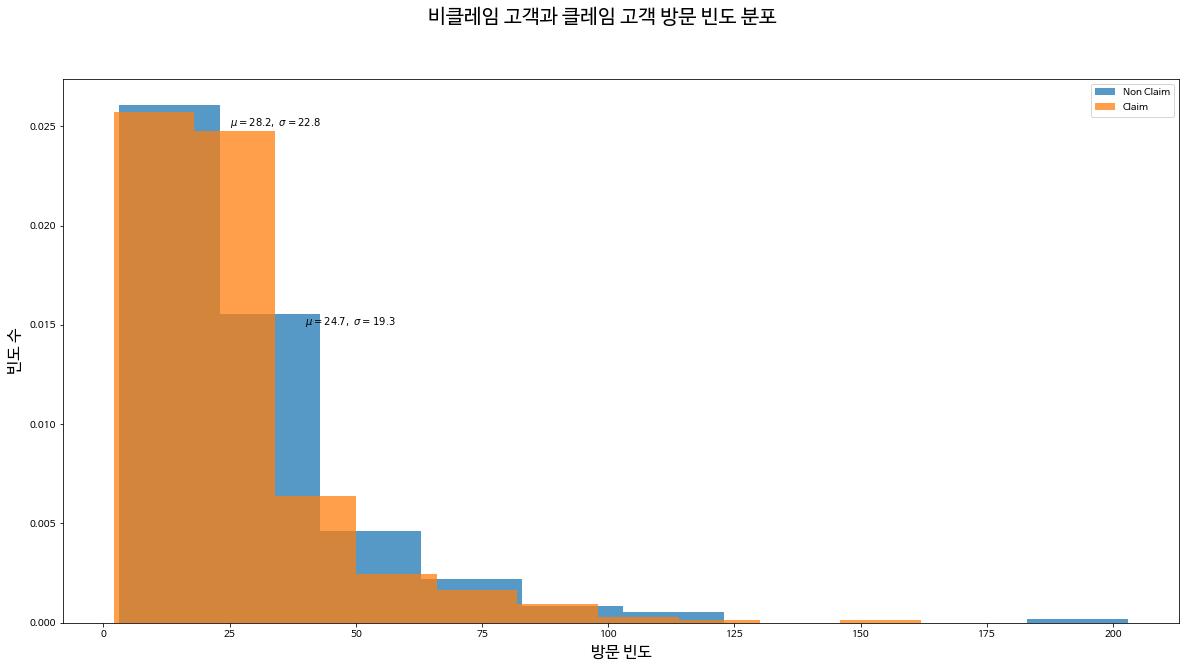

In [8]:
import matplotlib
#한글 깨짐 방지
matplotlib.rcParams['font.family'] = 'NanumBarunGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

Non_claim = plt.hist(df[df.클레임접수여부 == 0]['방문빈도'], label= "Non Claim",
                     density= True,
                     alpha=0.75)
claim = plt.hist(df[df.클레임접수여부 == 1]['방문빈도'], label= "Claim",
                       density= True,
                       alpha=0.75)     
plt.suptitle("비클레임 고객과 클레임 고객 방문 빈도 분포", fontsize= 20)
plt.xlabel("방문 빈도", fontsize= 16)
plt.ylabel("빈도 수", fontsize= 16)

plt.legend()
plt.text(25, .025,
         f"$\mu= {df[df.클레임접수여부 == 0]['방문빈도'].mean(): .1f}, \ \sigma= {df[df.클레임접수여부 == 0]['방문빈도'].std(): .1f}$")
plt.text(40, .015,
         f"$\mu= {df[df.클레임접수여부 == 1]['방문빈도'].mean(): .1f}, \ \sigma= {df[df.클레임접수여부 == 1]['방문빈도'].std(): .1f}$")
plt.show()

####6.4 쌍체표본 t-검정


(1) 개념
<br/>
쌍체표본 t-검정: 동일한 표본이 두 개의 서로 다른 상황(실험 처리 여부 혹은 시간의 흐름)에서 특정 수치형 변수의 평균이 동일한 지의 여부를 판단하는 분석방법이다. $t$값은 
\begin{align}
    &D_{i} = X_{i} - Y_{i} \quad(i = 1,\dots,n) \\
    &t = \dfrac{(\bar{D}) - (\mu_{D})}{\frac{s_{D}}{\sqrt{n}}}, 
    \qquad \mu_{D} \in (\bar{X} - \bar{Y}) \pm t_{(\frac{\alpha}{2},n-1)}\cdot \frac{s_{D}}{\sqrt{n}} \\
    &\text{where} \quad \mu_{D} = \mu_{X} - \mu_{Y} ,\quad \bar{D} = \frac{\sum_{i=1}^{n} D_{i}}{n}, \quad s_{D} = \frac{\sum_{i=1}^{n}(D_{i} - \bar{D})^{2}}{n-1}
\end{align}
이다. 두 쌍체 그룹의 표본 평균의 차에서 두 쌍체 그룹의 모평균의 차를 표준오차로 나눈 비율이다. $t$값이 클 수록 두 쌍체 그룹의 평균의 차이가 크다는 의미다.
<br/>
<br/>
쌍체표본 t-검정의 특징
<br/>
* 독립표본 t-검정과 달리, 쌍체표본 t-검정은 분석 대상의 표본이 반드시 대응되어야 함.<br/>
* 쌍체 표본 데이터는 시간상 전후의 의미가 있기 때문에 집단간의 독립성 가정이 필요하지 않으며, 두 모분산이 같다고 가정할 필요도 없다.<br/>
* 만약, 데이터가 완전한 쌍체를 이루지 않는다면 결측치가 존재하는 것이므로, 하단과 같이 결측치 처리가 필요하다.<br/>

|       구분      |                                  설명                                  |
|:---------------:|:----------------------------------------------------------------------|
| 삭제법          | 결측치가 있는 경우 해당 표본을 삭제하고 분석                           |
| 표본 평균법     | 결측 값을 평균값으로 대체                                              |
| 단순 대치법     | 회귀분석 등으로 결측값을 예측                                          |
| 다중 대치법     | 대체 가능한 여러 값을 추정하고 무작위로 추출하여 할당                  |
| Hot-deck 대체법 | 해당 변수의 실제 관측된 값(동일한 특성을 가진) 중 하나를 추출하여 할당 | 
<표: 결측 값 처리 방법>

(2) 분석
A쇼핑 마케팅 팀은 그 동안 단순 포인트 적립 및 결제 시 차감 사용 방식을 등급별 사은품 및 할인 쿠폰 지급으로 개선하였다. 이를 통한 고객들의 만족도 변화가 통계적으로 유의미한지 알고 싶다.
<br/>
<br/>
* 비교 대상군: 기존 맴버쉽 만족도 vs 개선 맴버쉽 만족도
<br/>
* 사용 통계 검정: 쌍체표본 t-검정
* 가설
\begin{align}
    H_{0}(\text{귀무가설}) &= \text{A 쇼핑 고객들의 맴버쉽 프로그램 도입 전 만족도와 도입 후 만족도의 차이는 없다.}\\
    H_{1}(\text{연구가설}) &= \text{A 쇼핑 고객들의 맴버쉽 프로그램 도입 전 만족도와 도입 후 만족도의 차이가 있다.} 
\end{align}


In [19]:
#쌍체 표본 검정은 stats에서 ttest_rel를 불러온다
rel_stats, rel_p = stats.ttest_rel(df['멤버쉽_프로그램_가입후_만족도'],df['멤버쉽_프로그램_가입전_만족도'])
print("쌍체표본의 t-value: {:.4f}".format(rel_stats))
print("유의확률: {:}".format(rel_p))

쌍체표본의 t-value: 29.5604
유의확률: 1.7319140513197275e-138


일단 귀무가설으로 보아 양측 검증이므로 유의수준을 0.1이라 두었을 때, 유의확률과 비교해야하는 값은 0.05이다. 결과와 같이 유의확률이 유의수준보다 작게 나왔으므로 귀무가설을 기각한다. 즉, 맴버쉽 프로그램 도입 후 고객들의 만족도는 차이가 있다고 할 수 있다.